# TP 3.  Analyse du dataset Vowel

<img src="http://media.giphy.com/media/citBl9yPwnUOs/giphy.gif"  width="300">

## Plan :

   [- Statistiques descriptives](#1)
   
   [- Naive Bayes / LDA / QDA](#2)
   
   [- k-NN](#3)
   
   [- Decision tree](#4)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

Adresse pour charger les données:

https://web.stanford.edu/~hastie/ElemStatLearn/data.html

Les mettre au format csv et les placer dans le même dossier que votre fichier Python.

In [24]:
train_load = pd.read_csv('vowel.train.csv', sep=',')
test_load = pd.read_csv('vowel.test.csv', sep=',')

In [25]:
train = train_load.iloc[:,1:12]
test = test_load.iloc[:,1:12]

In [28]:
train.data = train.iloc[:,1:11]
train.target = train.iloc[:,0]
test.data = test.iloc[:,1:11]
test.target = test.iloc[:,0]

<img src="http://media.giphy.com/media/ASd0Ukj0y3qMM/giphy.gif" width = 300>
<a id="1"></a> 
 
# 1. Statistiques descriptives


In [29]:
train.shape

(528, 11)

In [30]:
test.data.shape

(462, 10)

In [32]:
train.describe()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,6.000000,-3.166695,1.735343,-0.448002,0.524983,-0.389280,0.584960,0.017477,0.417394,-0.268112,-0.084568
std,3.165277,0.957965,1.160970,0.741363,0.769361,0.722011,0.648547,0.479254,0.595580,0.619584,0.560317
min,1.000000,-5.211000,-1.274000,-2.487000,-1.409000,-2.127000,-0.836000,-1.537000,-1.293000,-1.613000,-1.680000
25%,3.000000,-3.923000,0.916750,-0.945500,-0.083500,-0.930750,0.108500,-0.297000,-0.018250,-0.673750,-0.507000
50%,6.000000,-3.097000,1.733000,-0.502500,0.456500,-0.417000,0.527500,0.040000,0.477000,-0.255000,-0.082500
75%,9.000000,-2.511750,2.403750,0.049250,1.164000,0.115500,1.009750,0.348000,0.861250,0.137500,0.301000
max,11.000000,-0.941000,5.074000,1.413000,2.191000,1.831000,2.327000,1.403000,1.673000,1.309000,1.396000


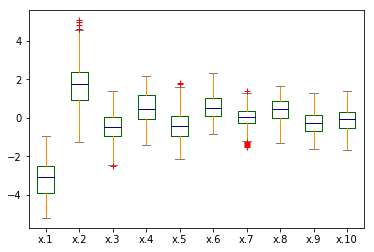

In [33]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
train.data.plot.box(color=color, sym='r+');

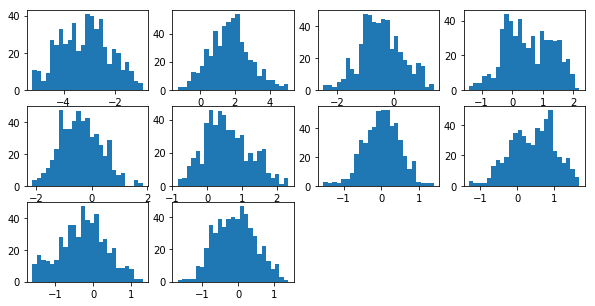

In [34]:
fig = plt.figure(figsize=(10,5))
for k in range(0,10):
    f = fig.add_subplot(3,4,k+1)
    f.hist(train.data.iloc[:,k], bins = 25);

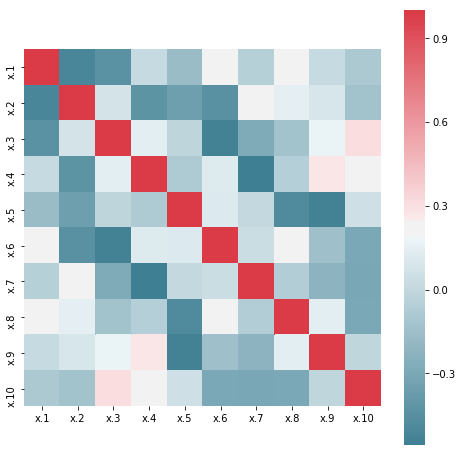

In [35]:
f, ax = plt.subplots(figsize=(8, 8))
corr = train.data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

<img src="http://media0.giphy.com/media/3BRDkVjKikYW4/giphy.gif" width = 300>
<a id="2"></a> 
 
# 2. Naive Bayes / LDA / QDA

Test de normalité

In [43]:
import scipy.stats as stats
u = stats.norm.rvs(size = 100000)
stats.normaltest(u)

NormaltestResult(statistic=3.5472836868475657, pvalue=0.1697137909454354)

In [44]:
v = stats.uniform.rvs(size = 40)
stats.normaltest(v)

NormaltestResult(statistic=4.036231082716128, pvalue=0.13290568450772544)

In [45]:
stats.normaltest(train.data.iloc[:,1])

NormaltestResult(statistic=3.9640376489359554, pvalue=0.13779078092818814)

A FAIRE : TEST de normalité pour toutes les colonnes et y

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
gnb = GaussianNB()
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()

In [47]:
y_pred = gnb.fit(train.data, train.target).predict(test.data)
print("Number of mislabeled points out of a total %d points : %d"
       % (test.data.shape[0],(test.target != y_pred).sum()))

Number of mislabeled points out of a total 462 points : 249


In [49]:
(test.target != y_pred).sum()/float(test.data.shape[0])*100

53.896103896103895

In [50]:
y_pred = LDA.fit(train.data, train.target).predict(test.data)
(test.target != y_pred).sum()/float(test.data.shape[0])*100

55.62770562770562

In [51]:
y_pred = QDA.fit(train.data, train.target).predict(test.data)
(test.target != y_pred).sum()/float(test.data.shape[0])*100

52.81385281385281

In [53]:
errors = []
for k in range(0,11):
    errors.append((y_pred[k::11] != test.target[k::11]).sum()/float(len(y_pred[k::11])))
errors

[0.11904761904761904,
 0.47619047619047616,
 0.7142857142857143,
 0.7142857142857143,
 0.6190476190476191,
 0.47619047619047616,
 0.47619047619047616,
 0.8571428571428571,
 0.09523809523809523,
 0.7380952380952381,
 0.5238095238095238]

<Container object of 11 artists>

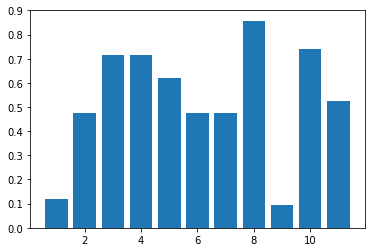

In [54]:
plt.bar(range(1,len(errors)+1), errors, align='center')

<img src="http://media3.giphy.com/media/eNTxLwTGW7E64/giphy.gif" width = 300>
<a id="3"></a> 
 
# 3. k-NN

In [55]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(train.data, train.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [56]:
error = 1 - knn.score(test.data, test.target)
print('Erreur: %f' % error)

Erreur: 0.435065


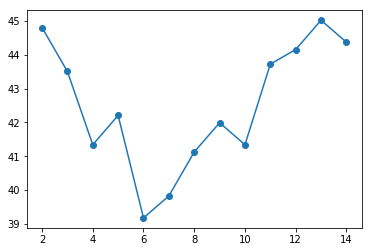

In [57]:
errors2 = []

for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors2.append(100*(1 - knn.fit(train.data, train.target).score(test.data, test.target)))

plt.plot(range(2,15), errors2, 'o-')
plt.show()

In [58]:
errorsKNN = []

knn = neighbors.KNeighborsClassifier(6)
knn = knn.fit(train.data, train.target)

for k in range(0,11):
    errorsKNN.append(100*(1 - knn.score(test.data[k::11], test.target[k::11])))

errorsKNN

[38.095238095238095,
 26.190476190476186,
 9.523809523809524,
 35.71428571428571,
 42.85714285714286,
 42.85714285714286,
 52.38095238095239,
 19.047619047619047,
 66.66666666666667,
 69.04761904761905,
 28.57142857142857]

In [59]:
errors2 = np.array(errors)*100
errorsKNN2 = np.array(errorsKNN)
print(errors2)
print(errorsKNN2)

[11.9047619  47.61904762 71.42857143 71.42857143 61.9047619  47.61904762
 47.61904762 85.71428571  9.52380952 73.80952381 52.38095238]
[38.0952381  26.19047619  9.52380952 35.71428571 42.85714286 42.85714286
 52.38095238 19.04761905 66.66666667 69.04761905 28.57142857]


In [60]:
errorsKNN2-errors2

array([ 26.19047619, -21.42857143, -61.9047619 , -35.71428571,
       -19.04761905,  -4.76190476,   4.76190476, -66.66666667,
        57.14285714,  -4.76190476, -23.80952381])

<img src="http://media1.giphy.com/media/hbd8nlok7kqnS/giphy.gif" width = 300>
<a id="4"></a> 
 
# 4. Decision tree

On pourra s'aider de la documentation suivante :

http://scikit-learn.org/stable/modules/tree.html

In [75]:
from sklearn import tree                                                        
clf = tree.DecisionTreeClassifier()                                                                                                                      
#[height, hair-length, voice-pitch]                                             
X = [ [180, 15,0],                                                              
      [167, 42,1],                                                              
      [136, 35,1],                                                              
      [174, 15,0],                                                              
      [141, 28,1]]                                                                                                                                       
Y = ['man', 'woman', 'woman', 'man', 'woman']                                                                                                               
clf = clf.fit(X, Y)                                                             
prediction = clf.predict([[133, 37,1]])                                         
print(prediction)    

['woman']


In [76]:
clf_gini = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(train.data, train.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [77]:
clf_gini.predict(test.data)

array([ 1,  2,  2,  4, 11, 11, 11,  8,  8, 10, 11,  1,  2, 11,  4, 11, 11,
       11,  8,  8, 10,  2,  1,  2,  2,  4, 11, 11, 11,  8,  8, 10,  2,  1,
        2,  2,  4, 11, 11,  2,  8,  8, 10, 11,  1,  2,  2,  4, 11, 11, 11,
        8, 10, 10, 10,  1,  2,  2,  4, 11, 11, 11,  8, 10, 10, 10,  2, 10,
        4,  4, 11, 11,  8,  8, 10, 10, 10,  2, 10,  4,  4, 11, 11, 10,  8,
       10, 10, 10,  2, 10,  4,  4, 11, 11, 10,  8, 10, 10, 10,  2, 10,  4,
        4, 11, 11, 10,  8, 10, 10, 10,  2, 10,  4,  4, 11, 11, 10,  8, 10,
       10, 10,  2, 10,  4,  4, 11, 11, 10,  8, 10, 10, 10,  1, 11, 11, 11,
       11, 11, 11, 10, 10, 10, 10,  1, 11, 11, 11, 11, 11, 11, 10, 10, 10,
       10,  1, 11, 11,  4, 11, 11, 11, 10, 10, 10, 10,  1, 11, 11, 11, 11,
       11, 11,  8, 10, 10, 10,  1,  2, 11, 11, 11, 11, 11,  8, 10, 10, 10,
        1,  2, 11, 11, 11, 11, 11,  8, 10, 10, 10,  1, 11,  4,  4, 11, 11,
       11, 10, 10, 10, 10,  1, 11,  4,  4, 11, 11, 11, 10, 10, 10, 10,  1,
       11,  4,  4, 11, 11

In [79]:
print(len(test.target))
(clf_gini.predict(test.data) != test.target).sum()

462


336